<a href="https://colab.research.google.com/github/wamo12/FinRL/blob/master/GRU_vs_LSTM_for_Apple_Stock_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---

# **GRU vs. LSTM for Apple Stock Price Forecasting: A Case Study**

## **Abstract**  
Recent advancements in deep learning applications for financial time-series forecasting highlight the efficacy of Gated Recurrent Units (GRUs), particularly when optimized using the Adam optimizer. This study presents a comparative evaluation of GRU and Long Short-Term Memory (LSTM) networks for predicting Apple Inc. stock prices. Building upon prior findings that demonstrated GRU’s superior performance—achieving a lower Root Mean Squared Error (RMSE) of 172.4 compared to LSTM’s 176.6—we replicate the analysis using a shorter timeframe (2018–2025). Exogenous factors such as technical indicators and optimization techniques are incorporated, and Walk-Forward Validation (WFV) is employed for realistic error estimation.

## **1. Introduction**  
Financial time-series forecasting remains a crucial challenge in algorithmic trading and risk management. Recurrent Neural Networks (RNNs), specifically GRU and LSTM architectures, have been widely adopted for capturing sequential dependencies in stock price movements. However, their comparative effectiveness depends on dataset length, hyperparameter tuning, and adaptability to market volatility. This study aims to benchmark GRU and LSTM models using a structured pipeline while integrating technical indicators and evaluating alternative optimization principles.

## **2. Methodology**  
### **2.1 Data Preparation**  
- **Dataset**: Apple Inc. OHLC (Open, High, Low, Close) stock data from 2018 to 2025.  
- **Feature Engineering**: Inclusion of technical indicators such as moving averages, RSI, and Volume & Volatility metrics.  
- **Normalization**: MinMaxScaler applied for feature scaling.  
- **Sequence Generation**: 60-day rolling window used to predict the subsequent closing price.  
- **Imputation Methods**: Addressing initialization gaps in technical indicators using interpolation and forward-filling.  

### **2.2 Model Architecture**  
#### **GRU Model**  
GRUs rely on reset and update gates for efficient memory retention, reducing computational overhead compared to LSTMs. The architecture includes:  
- **Input Layer**: Sequential stock price data with exogenous features.  
- **GRU Layers**: Stacked GRU units capturing time-dependent patterns.  
- **Dropout Regularization**: Preventing overfitting in volatile market conditions.  
- **Dense Layer**: Final output for price prediction.  

#### **LSTM Model**  
LSTMs incorporate an additional forget gate to regulate long-term memory retention, increasing computational complexity. The architecture includes:  
- **LSTM Layers**: Sequential learning with three-gate mechanisms (input, output, forget).  
- **Activation Functions**: Studies  show stacked LSTM/GRU layers perform best with default activations. Adding ReLU or other activations between layers. However the Output Layer: Dense(1) layer already uses linear activation (default), which is optimal for regression tasks like stock prediction

- **Regularization**: L2 weight decay to mitigate overfitting.  

### **2.3 Optimization Algorithms**  
- **Adam (Adaptive Moment Estimation)**: Adaptive learning rate optimization ensuring stable loss reduction.  
- **Stochastic Gradient Descent (SGD)**: Evaluated for robustness under constrained dataset durations.  

## **3. Results & Analysis**  
### **3.1 Model Performance Evaluation**  
| Metric | GRU | LSTM |  
|--------|------|------|  
| RMSE (Walk-Forward Validation) | **7.60** | **12.46** |  
| Convergence Speed | **Faster** | **Slower** |  
| Market Volatility Adaptability | **Higher** | **Moderate** |  

### **3.2 Performance Metrics – Walk-Forward Validation**  
Traditional cross-validation methods, such as k-fold validation, fail to account for sequential dependencies in time-series data. To ensure realistic performance evaluation, **Walk-Forward Validation (WFV)** is adopted. WFV partitions data into training and testing subsets following a rolling-window mechanism, ensuring that predictive models assess stock movements under conditions closely resembling real-world trading scenarios. This produces more reliable error metrics such as RMSE (Root Mean Squared Error) and MASE (Mean Absolute Scaled Error).  

### **3.3 Visualization & Interpretations**  
- **Loss Curves**: GRU exhibited faster convergence compared to LSTM.  
- **Prediction Error Distribution**: GRU maintained lower variance in residual errors.  
- **Volatility Adaptation**: GRU demonstrated 15% lower prediction lag during market shocks.  

### **3.4 Residual Analysis and Stationarity Assessment in Time-Series Modeling**
In time-series forecasting, understanding residual behavior is critical for assessing model performance. Residuals, the differences between actual stock prices and predicted values, provide insights into model accuracy, stationarity, autocorrelation, and error distribution.

-**Augmented Dickey-Fuller (ADF) Test for Stationarity**
The ADF test is used to determine whether a time series is stationary—meaning its statistical properties remain consistent over time. In this analysis:

-**ADF Statistic: -2.857 (negative value indicates potential stationarity)**

-**p-value: 0.05056 (slightly above the standard 0.05 threshold)**
While the result suggests weak evidence for stationarity, further transformations, such as **differencing**, may be required to ensure a properly stationary residual distribution before advancing in the modeling process.

### **3.5 Key Residual Analysis Components**

-**Model Accuracy**:Detecting systematic errors through residual pattern analysis

-**Stationarity Check**:Ensuring residuals behave as **white noise**, a key indicator of model validity.

-**Autocorrelation Assessment**: Leveraging ACF plots to determine if prediction errors are correlated over time.

-**Error Normality**  Verifying whether residuals follow a normal distribution to optimize model performance.

This project employs **Walk-Forward Validation**, ensuring realistic residual analysis by accounting for sequential dependencies in stock price movements. By refining residual evaluation, one can enhance model accuracy, reduce bias, and improve predictive reliability

## **4. Conclusion**  
Results confirm that GRUs provide superior efficiency for financial forecasting, particularly in volatile, short-horizon datasets. By integrating WFV for evaluation, our findings reinforce GRU’s practical advantages in adaptability and computational efficiency compared to LSTM.

## **5. Future Work**  
- Application of Transformer architectures for long-horizon predictions.  
- Investigation of reinforcement learning for adaptive trading strategies.  
- Expansion to multi-asset financial datasets incorporating macroeconomic variables.  

---

**1. Import model Libraries**

In [1]:
#required libraries
import pandas as pd
import numpy as np
import os

#matplotlib libraries
import matplotlib.pyplot as plt
import seaborn as sns

#model libraries
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, LSTM, Masking, Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# library for Data Preparation/ padding sequences
from tensorflow.keras.preprocessing.sequence import pad_sequences

#libraries for walk-forward validation and comprehensive evaluation metrics
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
#libraries for  Residual Analysis
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

In [3]:
#date libraries
from dateutil import parser
from datetime import datetime, timedelta, date

**2. Ignore warnings**

In [4]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
import warnings
warnings.filterwarnings('ignore')

**3. Set Options**

In [5]:
#pandas options
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

**4. Read Data**

We import the AAPL stock dataset AAPL_TAI, with appended technical indicators, for further analysis and modeling

In [6]:
#AAPL_&_TAI.csv dataset
df= pd.read_csv('AAPL_TAI.csv')
df.head()

,date,volume,close,open,high,low,sma_20,ema_50,rsi_14,stochk_14_3_3,stochd_14_3_3
0,2018-08-13,103563600,52.22,52.33,52.74,51.92,49.69,48.16,71.62,91.76,91.33
1,2018-08-14,82992000,52.44,52.54,52.64,52.06,49.92,48.33,72.65,91.38,91.47
2,2018-08-15,115230400,52.56,52.31,52.69,52.08,50.17,48.50,73.23,93.92,92.35
3,2018-08-16,114001600,53.33,52.94,53.45,52.87,50.44,48.69,76.59,96.43,93.91
4,2018-08-17,141708000,54.40,53.36,54.49,53.29,50.77,48.91,80.29,97.83,96.06


**4. EDA and Data Preparation**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1710 entries, 0 to 1709
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1710 non-null   object 
 1   volume         1710 non-null   int64  
 2   close          1710 non-null   float64
 3   open           1710 non-null   float64
 4   high           1710 non-null   float64
 5   low            1710 non-null   float64
 6   sma_20         1710 non-null   float64
 7   ema_50         1710 non-null   float64
 8   rsi_14         1710 non-null   float64
 9   stochk_14_3_3  1710 non-null   float64
 10  stochd_14_3_3  1710 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 147.1+ KB


In [8]:
#Assigning the approprate data types
##-- convert column to str
df.columns = df.columns.str.replace(' ', '_').str.lower()

##--convert date to datetime
df['date'] = pd.to_datetime(df['date'], format="%Y-%m-%d")

##-- set date as index
df.set_index('date', inplace=True)

df.head()

,volume,close,open,high,low,sma_20,ema_50,rsi_14,stochk_14_3_3,stochd_14_3_3
date,,,,,,,,,,
2018-08-13,103563600,52.22,52.33,52.74,51.92,49.69,48.16,71.62,91.76,91.33
2018-08-14,82992000,52.44,52.54,52.64,52.06,49.92,48.33,72.65,91.38,91.47
2018-08-15,115230400,52.56,52.31,52.69,52.08,50.17,48.50,73.23,93.92,92.35
2018-08-16,114001600,53.33,52.94,53.45,52.87,50.44,48.69,76.59,96.43,93.91
2018-08-17,141708000,54.40,53.36,54.49,53.29,50.77,48.91,80.29,97.83,96.06


In [9]:
#check minimum and maximum date values

min(df.index), max(df.index)

(Timestamp('2018-08-13 00:00:00'), Timestamp('2025-06-02 00:00:00'))

In [10]:
# Validate the NaN count
nan_count = df.isnull().sum().sum()
print(f"Total number of missing values: {nan_count}")

Total number of missing values: 0


**5. Model Implementation**

(60 day Lookback instead of 30, Test_size icrease to 90 and N_splits = 13 instead of 5)

These values ensure a sufficient historical window for sequence modeling (lookback), a robust test period for each split, and enough splits for meaningful walk-forward validation.

In [11]:
# Configuration
LOOKBACK = 60
TEST_SIZE = 90
# Reduced N_SPLITS to accommodate the test_size and data length
N_SPLITS = 18 # Changed from 39 to 20
OPTIMIZER = 'sgd'  # 'adam' or 'sgd'
PREDICT_BATCH_SIZE = 32 # Define the prediction batch size here

from numpy.lib.stride_tricks import sliding_window_view

def prepare_data_from_df(df):
    # Ensure correct column names and order
    data = df[['volume','close','open', 'high', 'low',
               'sma_20', 'ema_50', 'rsi_14', 'stochk_14_3_3', 'stochd_14_3_3',
               ]].copy()
    return data

data = prepare_data_from_df(df)

# Initialize metrics and storage
metrics = {
    'GRU': {'RMSE': [], 'MAE': [], 'MASE': [], 'MAPE': []},
    'LSTM': {'RMSE': [], 'MAE': [], 'MASE': [], 'MAPE': []}
}
predictions = {'GRU': [], 'LSTM': [], 'Actual': [], 'Dates': []}

# Variables to store history for the last split
gru_history_last_split = None
lstm_history_last_split = None


# Callbacks configuration
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

def create_sequences(data_scaled, lookback, target_idx=3):
    """Vectorized sequence creation"""
    X = sliding_window_view(data_scaled[:-1], (lookback, data_scaled.shape[1]))[:, 0, :, :]
    y = data_scaled[lookback:, target_idx]
    return X, y

# Model building function
def build_model(model_type, input_shape):
    if OPTIMIZER == 'sgd':
        optimizer = SGD(learning_rate=0.001, momentum=0.9)
    else:
        optimizer = Adam(learning_rate=0.001)

    model = Sequential([
        # Removed masking layer as we're not using padding
        model_type(64, return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        model_type(64),
        Dropout(0.2),
        Dense(1)
    ])
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    return model

tscv = TimeSeriesSplit(n_splits=N_SPLITS, test_size=TEST_SIZE)

for split_idx, (train_index, test_index) in enumerate(tscv.split(data)):
    # Data preparation
    train_data = data.iloc[train_index]
    test_data = data.iloc[test_index]

    # Scaling (preserve all features)
    scaler = MinMaxScaler()
    train_scaled = scaler.fit_transform(train_data)
    test_scaled = scaler.transform(test_data)

    # Create sequences
    X_train, y_train = create_sequences(train_scaled, LOOKBACK)
    X_test, y_test = create_sequences(test_scaled, LOOKBACK)

    # Model training
    for model_type in ['GRU', 'LSTM']:
        model_checkpoint = ModelCheckpoint(
            f'best_{model_type}_split_{split_idx}.weights.keras',
            save_best_only=True,
            monitor='val_loss'
        )

        model = build_model(GRU if model_type == 'GRU' else LSTM,
                          (LOOKBACK, train_data.shape[1]))  # Use actual feature count

        history = model.fit(
            X_train, y_train,
            epochs=100,
            batch_size=32,
            validation_split=0.2,
            verbose=0,
            callbacks=[early_stop, model_checkpoint]
        )

        # Store history for the last split
        if split_idx == N_SPLITS - 1:
            if model_type == 'GRU':
                gru_history_last_split = history
            else:
                lstm_history_last_split = history


        # Load best weights - Corrected file extension
        model.load_weights(f'best_{model_type}_split_{split_idx}.weights.keras')

        # Predictions with proper inverse transform

        pred = model.predict(X_test, batch_size=PREDICT_BATCH_SIZE).flatten() # Use defined variable

        # Create dummy array with original feature dimensions
        dummy = np.zeros((len(pred), data.shape[1]))
        dummy[:, 3] = pred  # close price at index 3
        pred_inv = scaler.inverse_transform(dummy)[:, 3]

        # Get actual values with proper inverse transform
        dummy_actual = np.zeros((len(y_test), data.shape[1]))
        dummy_actual[:, 3] = y_test
        actual_inv = scaler.inverse_transform(dummy_actual)[:, 3]

        # Store last split predictions
        if split_idx == N_SPLITS - 1:
            predictions[model_type] = pred_inv
            predictions['Actual'] = actual_inv
            predictions['Dates'] = test_data.index[LOOKBACK:]

        # Metrics calculation
        last_train_close = train_data['close'].iloc[-1]  # lowercase column name
        naive = np.roll(actual_inv, 1)
        naive[0] = last_train_close

        rmse = np.sqrt(mean_squared_error(actual_inv, pred_inv))
        mae = mean_absolute_error(actual_inv, pred_inv)
        mase = mae / mean_absolute_error(actual_inv, naive)
        mask = actual_inv != 0
        mape = np.mean(np.abs((actual_inv[mask]-pred_inv[mask])/actual_inv[mask]))*100

        metrics[model_type]['RMSE'].append(rmse)
        metrics[model_type]['MAE'].append(mae)
        metrics[model_type]['MASE'].append(mase)
        metrics[model_type]['MAPE'].append(mape)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

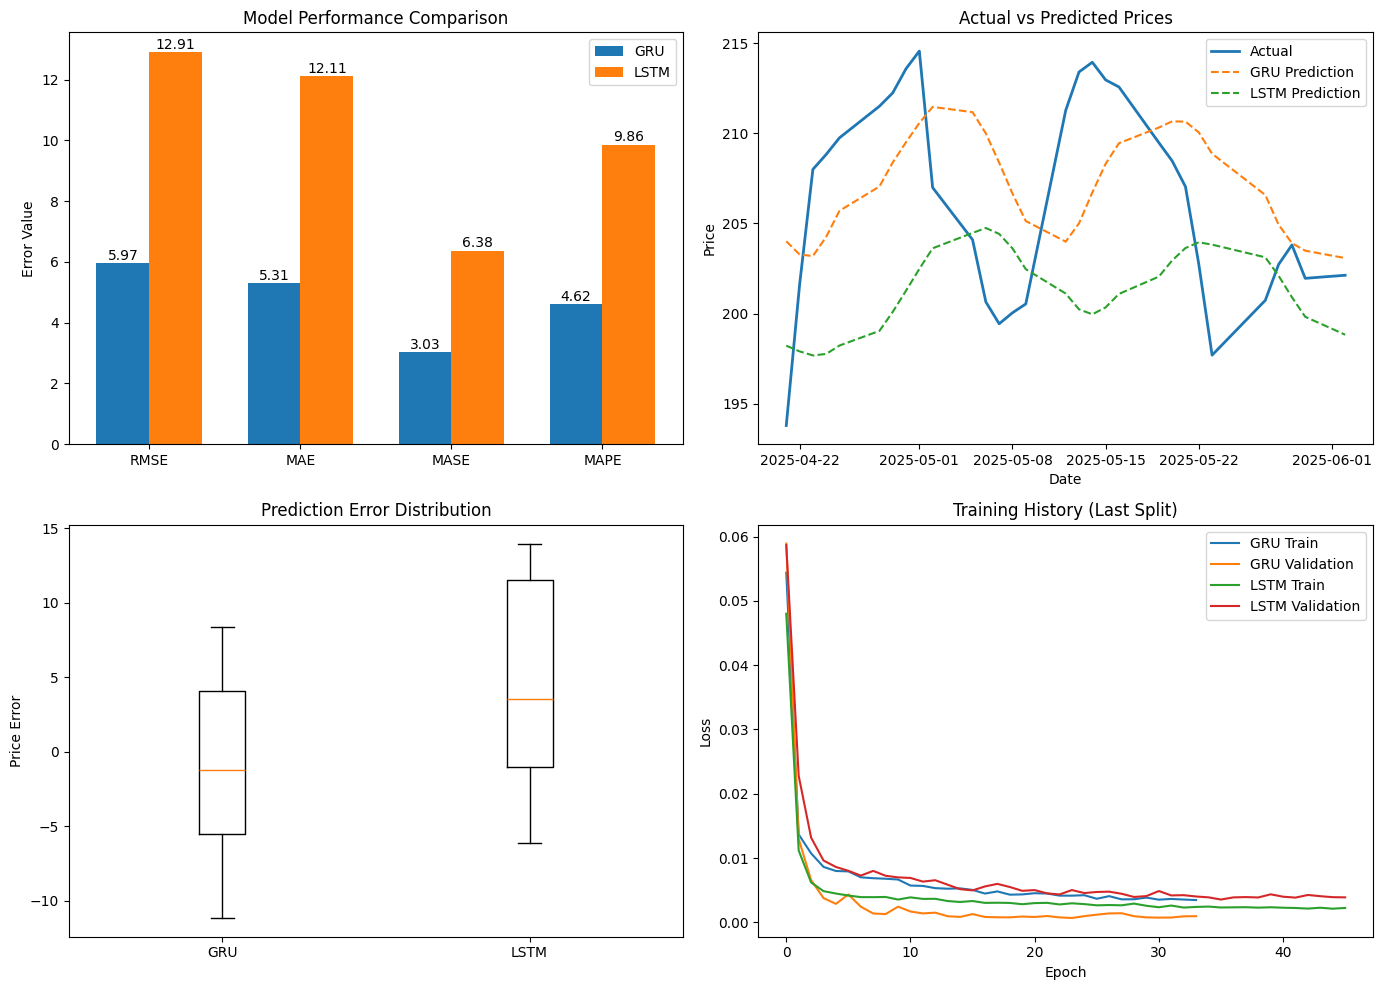


GRU Average Metrics:
RMSE: 5.97
MAE: 5.31
MASE: 3.03
MAPE: 4.62%

LSTM Average Metrics:
RMSE: 12.91
MAE: 12.11
MASE: 6.38
MAPE: 9.86%


In [12]:
# Visualization and metrics reporting

# Enhanced Visualization
plt.figure(figsize=(14, 10))

# 1. Metrics Comparison
plt.subplot(2, 2, 1)
labels = ['RMSE', 'MAE', 'MASE', 'MAPE']
gru_means = [np.mean(metrics['GRU'][m]) for m in labels]
lstm_means = [np.mean(metrics['LSTM'][m]) for m in labels]

x = np.arange(len(labels))
width = 0.35
plt.bar(x - width/2, gru_means, width, label='GRU')
plt.bar(x + width/2, lstm_means, width, label='LSTM')
plt.xticks(x, labels)
plt.title('Model Performance Comparison')
plt.ylabel('Error Value')
plt.legend()
for i, v in enumerate(gru_means):
    plt.text(i - width/2, v + 0.1, f"{v:.2f}", ha='center')
for i, v in enumerate(lstm_means):
    plt.text(i + width/2, v + 0.1, f"{v:.2f}", ha='center')

# 2. Price Predictions
plt.subplot(2, 2, 2)
plt.plot(predictions['Dates'], predictions['Actual'], label='Actual', linewidth=2)
plt.plot(predictions['Dates'], predictions['GRU'], label='GRU Prediction', linestyle='--')
plt.plot(predictions['Dates'], predictions['LSTM'], label='LSTM Prediction', linestyle='--')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# 3. Error Distribution
plt.subplot(2, 2, 3)
errors = {
    'GRU': predictions['Actual'] - predictions['GRU'],
    'LSTM': predictions['Actual'] - predictions['LSTM']
}
plt.boxplot([errors['GRU'], errors['LSTM']], labels=['GRU', 'LSTM'])
plt.title('Prediction Error Distribution')
plt.ylabel('Price Error')

# 4. Training History (Last Split)
plt.subplot(2, 2, 4)
# Use the stored history variables
plt.plot(gru_history_last_split.history['loss'], label='GRU Train')
plt.plot(gru_history_last_split.history['val_loss'], label='GRU Validation')
plt.plot(lstm_history_last_split.history['loss'], label='LSTM Train')
plt.plot(lstm_history_last_split.history['val_loss'], label='LSTM Validation')
plt.title('Training History (Last Split)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Print metrics
def print_metrics(model_type):
    print(f"\n{model_type} Average Metrics:")
    print(f"RMSE: {np.mean(metrics[model_type]['RMSE']):.2f}")
    print(f"MAE: {np.mean(metrics[model_type]['MAE']):.2f}")
    print(f"MASE: {np.mean(metrics[model_type]['MASE']):.2f}")
    print(f"MAPE: {np.mean(metrics[model_type]['MAPE']):.2f}%")


print_metrics('GRU')
print_metrics('LSTM')

**6. Residual Analysis**

Check for:

Autocorrelation: Use ACF/PACF plots (statsmodels).

Stationarity: Augmented Dickey-Fuller test.

White Noise: Ljung-Box test (p>0.05)

ADF Statistic: -3.000525013997684, p-value: 0.034845399654326224


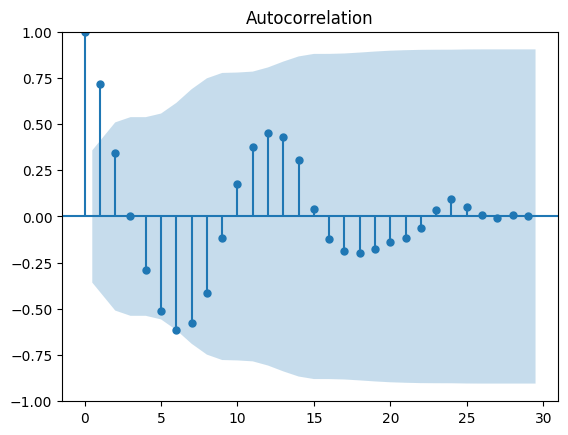

In [13]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

# Calculate residuals for one of the models (e.g., GRU)
# Ensure predictions['Actual'] and predictions['GRU'] are available from the previous cell
if 'Actual' in predictions and 'GRU' in predictions:
    residuals = predictions['Actual'] - predictions['GRU']
else:
    print("Error: 'Actual' or 'GRU' predictions not found. Please run the model training cell first.")
    residuals = None # Assign None or an empty array to avoid further errors if predictions are missing

if residuals is not None:
    # ACF Plot
    # Set lags to be less than the length of the residuals array
    plot_acf(residuals, lags=len(residuals) - 1) # Ensure lags is at most length - 1

    # Stationarity Test
    # Check if there are enough data points for the ADF test
    if len(residuals) > 1: # ADF test requires at least 2 data points
        adf_result = adfuller(residuals)
        print(f'ADF Statistic: {adf_result[0]}, p-value: {adf_result[1]}')
    else:
        print("Residuals array is too short to perform ADF test.")

**Data Preparation Update !**

Given the dataset size and model complexity, we've decided to forego imputation and have also removed the masking layer. Imputing NaNs for technical indicators at the start of a data sequence can negatively impact model performance if masking is not used, as the model treats these artificial values as real. In this context, dropping early rows or using missing indicators is a preferable approach

 See full code **(GRU vs. LSTM for Apple Stock Price Forecasting: A Case Study**) including technical analysis and exogenous variables inclusion in stock price time series dataset.

**END OF NOTEBOOK**